# Introduction to Time Series - 2

  This is the second part of introduction to time series analysis. Here we will see some terminologies like Auto correlation, Partial Auto correlation, stationarity of series, etc.,
  
  Here we make use of three datasets: 
  * Daily minimum temperature (daily_minimum_temperature.csv)
  * Total female birth rate (daily-total-female-births.csv)
                     



Ref:
  * https://datacamp.com
  * https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [1]:
!head daily_minimum_temperature.csv

"Date","Temp"
"1981-01-01",20.7
"1981-01-02",17.9
"1981-01-03",18.8
"1981-01-04",14.6
"1981-01-05",15.8
"1981-01-06",15.8
"1981-01-07",15.8
"1981-01-08",17.4
"1981-01-09",21.8


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
temp=pd.read_csv('daily_minimum_temperature.csv',header=0,index_col=0)
temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Figure size 720x360 with 0 Axes>

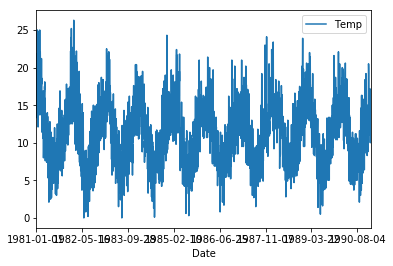

In [4]:
plt.figure(figsize=(10,5))
temp.plot()
plt.show()

# Autocorrelation

   Auto correlation is the correlation of a time series with itself with a time lag. From the visualization of minimum temperatures, we see that the series repeats itself after some times. So if we know the periodicity if the series, we can get better correlation with the lag of that.

In [5]:
temp['last year'] = temp.shift(365)
temp.head()

,Temp,last year
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN


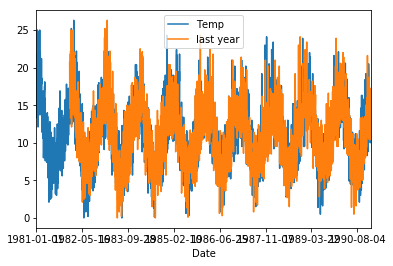

In [6]:
temp.plot()
plt.show()

There is a good correlation between the series and the last years value! 
We do not have values for 1980, so the last year column remains NaN for 1981 data. Lets calculate the correlation between the two series (The original and the lag).

In [7]:
temp.Temp.corr(temp['last year'])

0.5334852661349851

Here we see that the series have a autocorrelation of 0.533 with the lag of 365 days. How do we calculate the correlation for every lag? This can be done by using stats model.  

Text(0, 0.5, 'correlation')

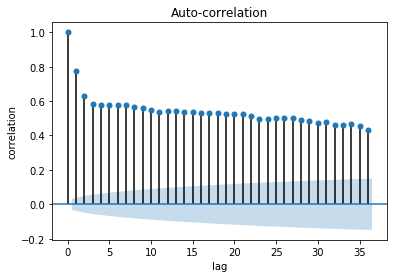

In [8]:
plot_acf(temp.Temp)
plt.title('Auto-correlation')
plt.xlabel('lag')
plt.ylabel('correlation')

At lag = 0, the correlation is 1.0 and decreases. When we see for lags till 365 days we find that, it has better correlation(0.5). 

Text(0, 0.5, 'correlation')

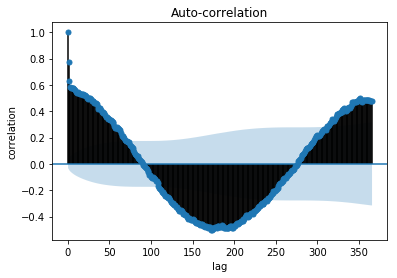

In [9]:
plot_acf(temp.Temp,lags=365)
plt.title('Auto-correlation')
plt.xlabel('lag')
plt.ylabel('correlation')

# Partial Autocorrelation

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

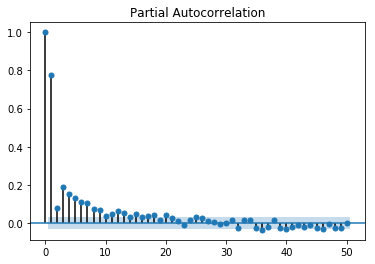

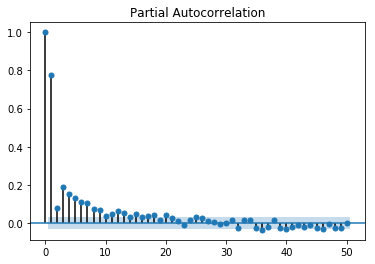

In [10]:
plot_pacf(temp.Temp,lags=50)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

# Stationary time series

Stationarity means the distributions is independent of time.

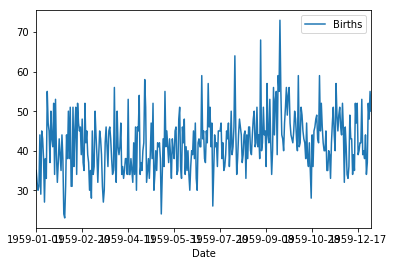

In [11]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5d1087f0>]],
      dtype=object)

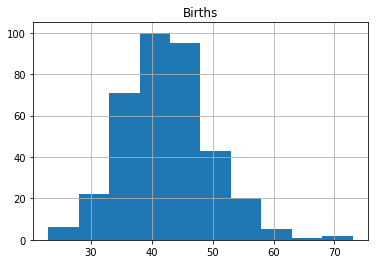

In [12]:
series.hist()

In [13]:
X = series.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


Here we see that mean and variance are almost equal in both parts of the data.

# Non Stationary time series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

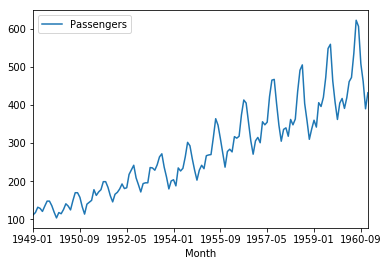

In [14]:
passengers=pd.read_csv('international-airline-passengers.csv',header=0,index_col=0)
passengers.plot()
plt.show()

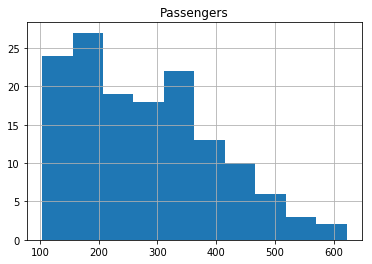

In [15]:
passengers.hist()
plt.show()

In [16]:
X = passengers.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


There is a huge difference between the mean and variance of both parts.

# Stationary or Not?

Here we not a seasonality in passengers dataframe. We can remove this seasonality and analyze more about it. We noted a exponential growth, we would like to remove this.

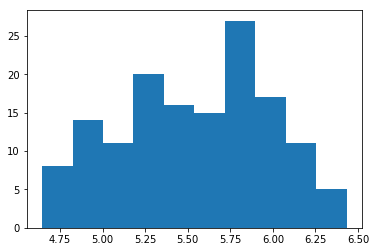

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


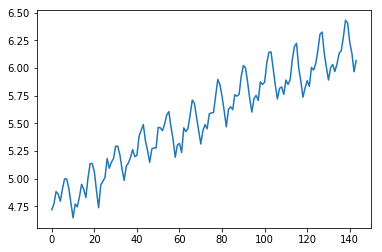

In [17]:
X = passengers.values
X=np.log(X)
plt.hist(X)
plt.show()
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

plt.plot(X)

Now we see the means are similar and varince also! But still we can see a seasonality and a trend! So comparing mean and standard deviations are not a good way of checking for stastical similarity. Here we can make use of a statistical test called 'Augmented Dickey Fuller Test'.

### Augmented Dickey Fuller Test

H0: Series is a random walk. It is not stationary.


H1: Series is time dependent, ie it is stationary.

In [18]:
from statsmodels.tsa.stattools import adfuller
X=series.Births
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


p value is very small. So we can neglect the null hypothesis. So we can say that the series is stationary.

In [19]:
X=passengers.Passengers
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


p value is large, so we cannot neglect null hypothesis and the series is non-stationary.